In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [7]:
merged = pd.read_csv('data/merged.csv')
population = pd.DataFrame({
    'ZipCode': merged['Zip Code'],
    'City': merged['City'],
    'Pills per Person per Year': merged['Pills'] / merged['Population'],
    'AGI per Return': merged['AGI thousands'] * 1e3 / merged['Tax Returns'],
    'Death Rate': merged['Death Rate']
})

In [24]:
sample = population[population['Pills per Person per Year'] > 0.2 * 365]
sample = sample[sample['AGI per Return'] > 4e4]

In [25]:
stats.ttest_1samp(sample['Death Rate'], population['Death Rate'].mean())

Ttest_1sampResult(statistic=3.1380778344285702, pvalue=0.0026362931944489184)

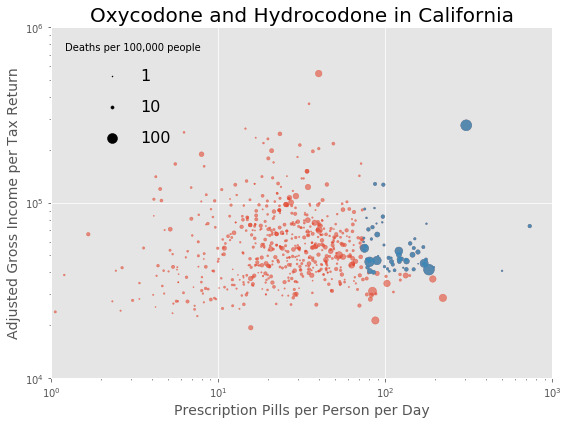

In [41]:
p = population
s = sample

plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.scatter(
    p['Pills per Person per Year'],
    p['AGI per Return'],
    s = p['Death Rate'],
    alpha=0.6
)
plt.scatter(
    s['Pills per Person per Year'],
    s['AGI per Return'],
    s = s['Death Rate'],
    alpha=0.8
)


for area in [1, 10, 100]:
    plt.scatter([], [], c='k', s=area, label=str(area))
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Deaths per 100,000 people', fontsize=16)

#plt.xticks([0.001, 0.01, 0.1, 1], ['0.001', '0.01', '0.1', '1'])
#plt.yticks([2e4, 1e5, 4e5], ['$20,000', '$100,000', '$400,000'])

#plt.text(4, 2e4, '$p = 0.007$', horizontalalignment='right', size=24)
#plt.text(0.005, 3.5e5, 'Population', horizontalalignment='left', size=16, c='C0')
#plt.text(0.005, 2.8e5, 'Sample', horizontalalignment='left', size=16, c='C1')

plt.xscale('log')
plt.yscale('log')

plt.xlim(1e0, 1e3) # Zoom
#plt.xlim(1e-3, 1e4)
plt.ylim(1e4, 1e6)

plt.title('Oxycodone and Hydrocodone in California', size=20)
plt.xlabel('Prescription Pills per Person per Day', size=14)
plt.ylabel('Adjusted Gross Income per Tax Return', size=14)
plt.tight_layout()
plt.savefig('images/scatter-log-zoom.png', dpi=300)